In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import os
#!pip install tqdm
#import tqdm


from mpl_toolkits import mplot3d

In [2]:
path = "../results/MLP_tuning_e00/"
epsilon=str(0.0)
maxT=str(5)
lst = []
nb=0
for i in (5,10,15,30):
    for j in (1,2):
        file = str(i) + "_" + str(j)+ "_" + maxT + "_" + epsilon + "_Deep_Hedging_Model_MLP_pd.csv"
        a=pd.read_csv(path+file).transpose()
        lst.append(a)
        nb+=1
a = pd.concat(lst)

In [3]:
price_diff = np.zeros(nb)
var = np.zeros(nb)
Cvar99 = np.zeros(nb)
predicted_price_diff = np.zeros(nb)
for i in range(1, 2*nb, 2):
    #print(a.iloc[i,19], a.iloc[i,15])
    price_diff[np.int((i-1)/2)] = np.abs(np.double(a.iloc[i,15])) - np.double(a.iloc[i,19])
    var[np.int((i-1)/2)] = (np.double(a.iloc[i,16]))
    Cvar99[np.int((i-1)/2)] = (np.double(a.iloc[i,5]))
    predicted_price_diff[np.int((i-1)/2)] = np.abs(np.double(a.iloc[i,17])) - np.double(a.iloc[i,19])

<ipython-input-3-24aa847969d1>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  price_diff[np.int((i-1)/2)] = np.abs(np.double(a.iloc[i,15])) - np.double(a.iloc[i,19])
<ipython-input-3-24aa847969d1>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

In [4]:
filename=[]
for i in (5,10,15,30):
    for j in (1,2):
        filename.append(str(i)+"_"+str(j))#str(i) + "_" + str(j)+ "_" + "5_0.0_Deep_Hedging_Model_MLP_pd.csv")

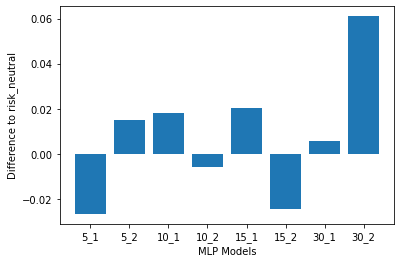

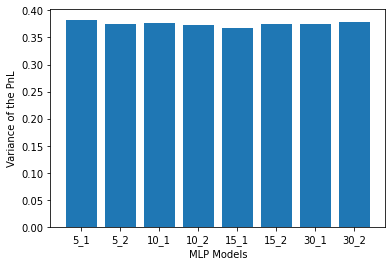

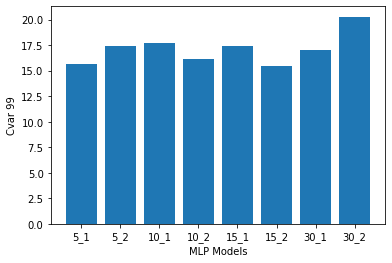

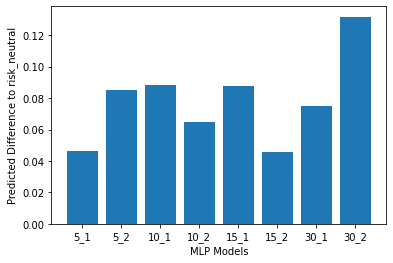

In [5]:
x=np.arange(nb)
plt.figure()
plt.ylabel('Difference to risk_neutral')
plt.xlabel('MLP Models')
plt.bar(x, price_diff)
plt.xticks(x, filename)

plt.figure()
plt.ylabel('Variance of the PnL')
plt.xlabel('MLP Models')
plt.bar(x, var)
plt.xticks(x, filename)

plt.figure()
plt.ylabel('Cvar 99')
plt.xlabel('MLP Models')
plt.bar(x, Cvar99)
plt.xticks(x, filename)

plt.figure()
plt.ylabel('Predicted Difference to risk_neutral')
plt.xlabel('MLP Models')
plt.bar(x, predicted_price_diff)
plt.xticks(x, filename)
plt.show()

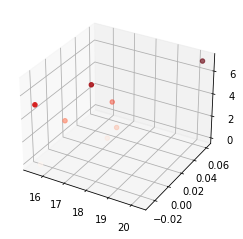

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = x
xdata = Cvar99
ydata = price_diff
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');

In [7]:
m=30
d=1
sel_file = str(m) + "_" + str(d) + "_5_0.0_Deep_Hedging_Model_MLP_var.csv"
val=pd.read_csv(path+sel_file).transpose()

In [15]:
bar =np.double(val.iloc[1,:])

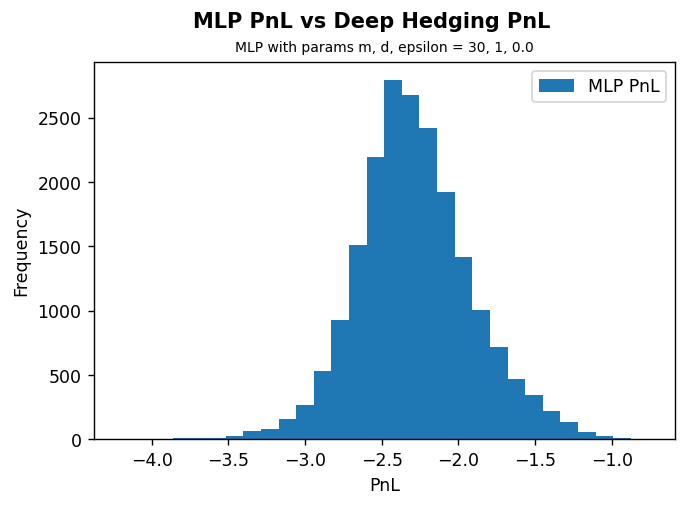

In [16]:
#bar =np.double(val.iloc[1,:])
# Plot Black-Scholes PnL and Deep Hedging PnL (with BS_price charged on both).
fig_PnL = plt.figure(dpi=125, facecolor='w')
fig_PnL.suptitle("MLP PnL vs Deep Hedging PnL \n",
                     fontweight="bold")
ax = fig_PnL.add_subplot()
ax.set_title("MLP with params m, d, epsilon = " + str(m) + ", " + str(d) + ", " + str(epsilon),
                 fontsize=8)
ax.set_xlabel("PnL")
ax.set_ylabel("Frequency")
ax.hist(bar, bins=30,
            label=["MLP PnL"])
ax.legend()

